In [6]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')


# import ML Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
logging.info('importing data set using pandas function')

In [44]:
# Load the dataset from the given URL
url="https://raw.githubusercontent.com/MontyVasita18/Crop_Recommendation_Model/refs/heads/main/Crop_Recommendation.csv"

df=pd.read_csv(url)
df.sample(frac=1)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1072,98,79,50,25.341198,84.473213,6.435917,91.064934,Banana
1496,82,26,47,28.504164,93.468065,6.565313,24.200072,Muskmelon
2065,91,41,37,24.485564,83.206300,6.132571,192.231622,Jute
571,2,56,23,26.653330,59.790234,7.550091,36.918526,MothBeans
1651,1,15,9,29.983647,94.552397,7.533509,115.356032,Orange
...,...,...,...,...,...,...,...,...
1155,24,33,35,29.263829,54.822579,5.342866,100.758623,Mango
1199,18,26,31,32.611261,47.749165,5.418475,91.101908,Mango
1488,99,29,55,29.193787,91.462411,6.660955,26.482403,Muskmelon
1157,22,17,26,28.698181,47.718757,4.754435,99.642454,Mango


In [41]:
# Checking the data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [10]:
# Checking for missing values in the dataset
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [38]:
# checking Correlation between different features and target variable (Crop)
df.corr()['Crop']

Nitrogen      -0.031130
Phosphorus    -0.491006
Potassium     -0.346417
Temperature    0.113606
Humidity       0.193911
pH_Value      -0.012253
Rainfall       0.045611
Crop           1.000000
Name: Crop, dtype: float64

In [40]:
df.Crop.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [16]:
from collections import OrderedDict

stats=[]

for i in df.columns:
    if df[i].dtype!='object':
     numerical_stats= OrderedDict({
        'feature':i,
        'unique_values':df[i].nunique(),
        'mode':df[i].mode()[0],
        'mean':df[i].mean(),
        'std_deviation':df[i].std(),
        'min_value':df[i].min(),
        'max_value':df[i].max(),
        'range':df[i].max() - df[i].min(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurtosis(),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats=pd.DataFrame(stats)

df_stats



,feature,unique_values,mode,mean,std_deviation,min_value,max_value,range,skewness,kurtosis,IQR
0,Nitrogen,137,22.000000,50.551818,36.917334,0.000000,140.000000,140.000000,0.509721,-1.058240,63.250000
1,Phosphorus,117,60.000000,53.362727,32.985883,5.000000,145.000000,140.000000,1.010773,0.860279,40.000000
2,Potassium,73,17.000000,48.149091,50.647931,5.000000,205.000000,200.000000,2.375167,4.449354,29.000000
3,Temperature,2200,8.825675,25.616244,5.063749,8.825675,43.675493,34.849818,0.184933,1.232555,5.792279
4,Humidity,2200,14.258040,71.481779,22.263812,14.258040,99.981876,85.723836,-1.091708,0.302134,29.686818
5,pH_Value,2200,3.504752,6.469480,0.773938,3.504752,9.935091,6.430338,0.283929,1.655581,0.951950
6,Rainfall,2200,20.211267,103.463655,54.958389,20.211267,298.560117,278.348850,0.965756,0.607079,59.715822
7,Rainfall,2200,20.211267,103.463655,54.958389,20.211267,298.560117,278.348850,0.965756,0.607079,59.715822


In [17]:
# Doing Label Encoding on the target variable (Crop) to convert it into numerical values
from sklearn.preprocessing import LabelEncoder

df['Crop']=LabelEncoder().fit_transform(df['Crop'])


In [32]:
# Splitting the data into features (X) and target (y)
X=df.drop(columns=['Crop','Rainfall'])
y=df['Crop']

y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int32

In [45]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


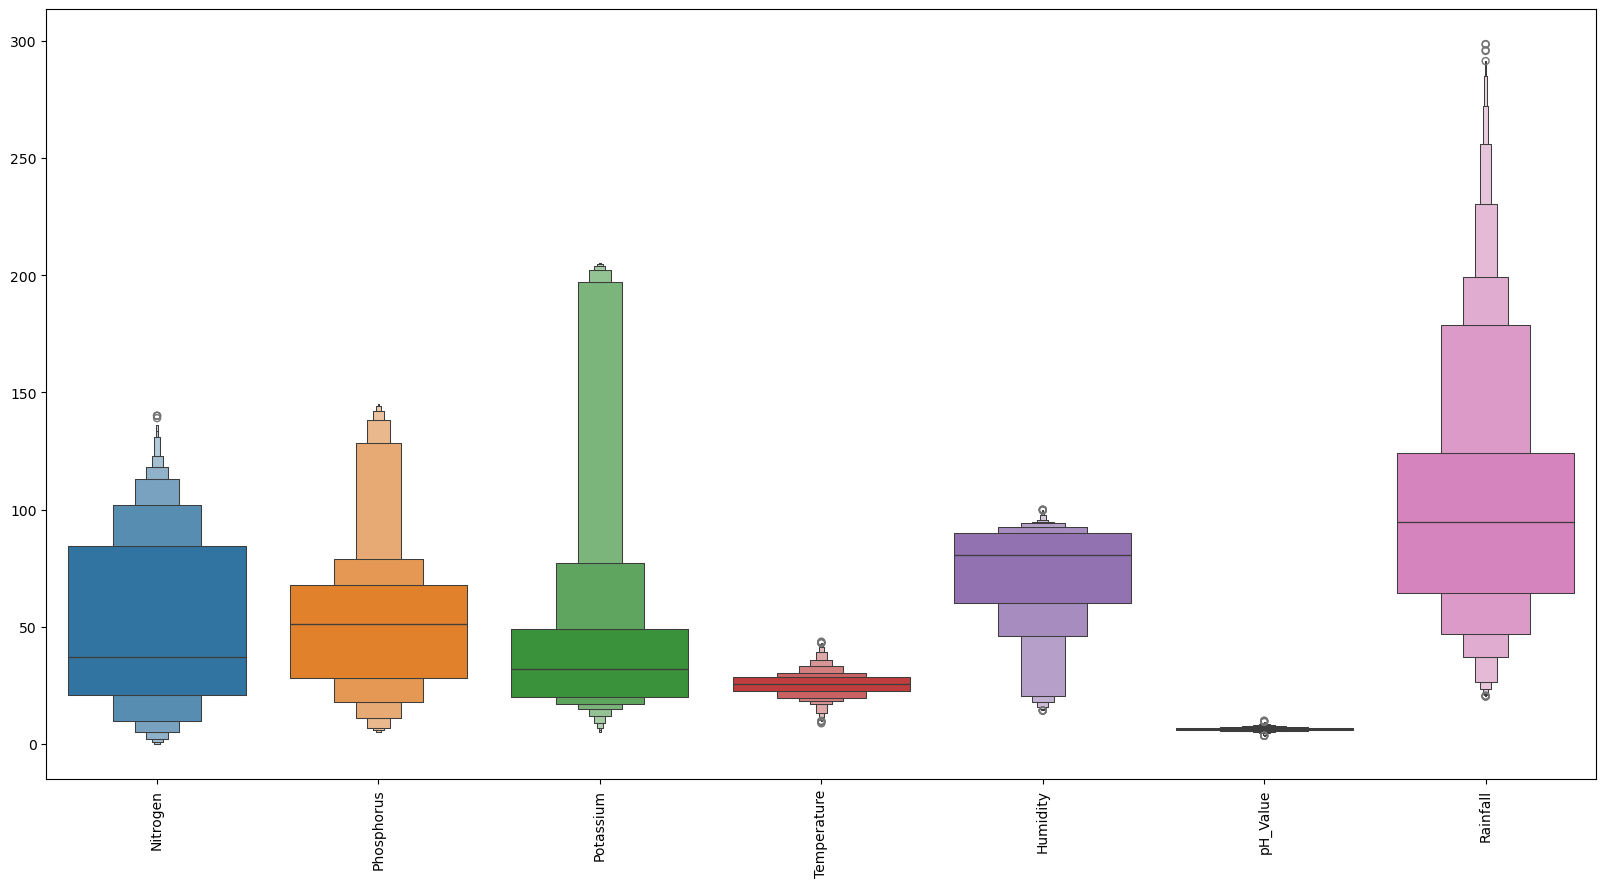

In [46]:
# Checking Outliers

plt.figure(figsize= (20,10))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

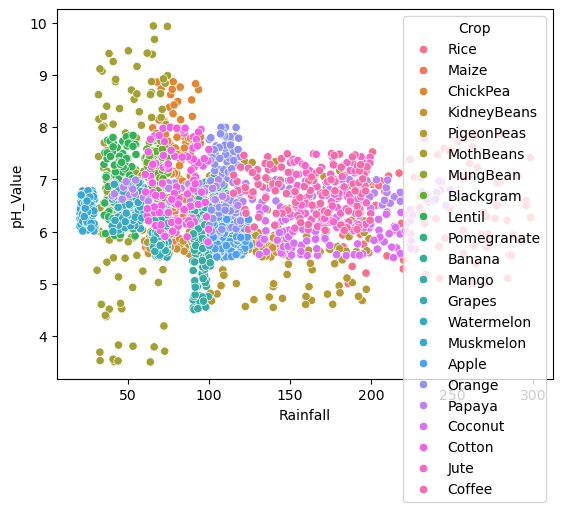

In [53]:
sns.scatterplot(df,x='Rainfall',y='pH_Value',hue='Crop')
plt.show()


In [47]:
# Appling Standardization

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [55]:
# Using Random Forest Classifier to predict the crop type

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_RF)



0.9606060606060606

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

y_pred_RFR=RF.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred_RFR)

0.9101084887565212

In [31]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(X_train,y_train)

y_pred_SVC=svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_SVC)   


0.9727272727272728